# PSYC 5P02- Introduction to Programming for Psychology
## Fall 2025

### Problem Set #4 - Grading Rubric

### Assigned November 14 25 - Due November 24
### Late Penalty: 5%/day


### Rubric:
* Accuracy & Efficiency: 50%
* Explaination and documentation: 50%

---

## **Question 1 --- Creating and Exploring Data with NumPy**

You will simulate data for **40 participants**, each completing **50 trials per condition** (100 trials total).

1.  Use NumPy to generate
    * Participant IDs (1-40)
    * Two Conditions: "congruent" and "incongruent"
    * Reaction times:
    - Congruent: mean = 520 ms, SD = 70 ms
    - Incongruent: mean 610 ms, SD = 70 ms
    * Add +/- 20ms uniformly distributed noise to all RTs
2.  Create a Pandas DataFrame with the columns: "participant", "condition", and "rt"
3.  Using the `df.head()` method and the df.describe(), display the first 10 rows of the DataFrame, and teh summary statistics

In [2]:
import numpy as np
import pandas as pd

# creating separate numpy arrays for the number of participants and conditions per participant - as given
participants = np.arange(1, 41) # 1 - 40 as the upper bound is not included in the arange function
# np.repeat is a numpy function that repeats each element of the given array N amount of times - as from the documentation
conditions = np.repeat(["congruent", "incongruent"], 50) 

# creating empty lists to store data for all the participants
# each list will contain 40 * 100 = 4000 elements total
all_trials = [] # this will be a list of the participant number associated with each trial
all_conditions = [] # this will be a list of the condition associated with each trial
all_rts = [] # this will be a list of the reaction time associated with each trial

for pid in participants: # this loop will repeat 40 times, once for each participant

    np.random.shuffle(conditions) # shuffles earlier defined conditions list for each participant
    rts = [] # an empty list to store the reaction times for current participant
    # the following loop goes through each condition in the conditions list and generates an RT accordingly
    for condition in conditions:
        if condition == "congruent":
            rt = np.random.normal(520, 70)
        if condition == "incongruent":
            rt = np.random.normal(610, 70)
        rts.append(rt)
    noise = np.random.uniform(-20, 21, size=100) # generating a list of noise quantities between -20 and +20 for the given set of RTs
    rts = rts + noise # adding to current RTs list
    
    all_trials.extend(np.repeat(pid, 100)) # uses the np.repeat function from above to assign the same participant number for the number of trials
    all_conditions.extend(conditions) # adds current condition list to master conditions list
    all_rts.extend(rts) # adds current rts list to master rts list

# creating a dataframe from the compiled lists in dict form
df = pd.DataFrame ({
    "participant": all_trials,
    "condition": all_conditions,
    "rt": all_rts })

print(df.head(10), '\n')
"""
using the dataFrame.groupby function as given below to
1) only calculate descriptives for RTs combined over each condition
2) only calculate descriptives for RTs combined over each participant
"""
print(df.groupby(['condition'])['rt'].describe(), '\n')
print(df.groupby(['participant'])['rt'].describe(), '\n')

   participant    condition          rt
0            1    congruent  457.577291
1            1  incongruent  588.627062
2            1    congruent  562.838268
3            1    congruent  436.778092
4            1  incongruent  552.292200
5            1  incongruent  573.183671
6            1    congruent  590.678280
7            1  incongruent  676.755277
8            1  incongruent  642.762658
9            1  incongruent  577.339478 

              count        mean        std         min         25%  \
condition                                                            
congruent    2000.0  522.030282  70.396532  240.100064  476.868407   
incongruent  2000.0  610.940830  70.681464  392.792942  563.123025   

                    50%         75%         max  
condition                                        
congruent    522.989546  567.128385  766.796595  
incongruent  610.446978  657.566681  876.491286   

             count        mean         std         min         25%  \
parti

**Comments:**
- Nice. Nice and clean an efficient.

- Code 6/6, documentation 6/6 **total: 12/12**

## **Question 2 --- Loading and Cleaning Data with Pandas**



1.  Using **indexing** (do NOT write a loop!), remove trials with RTs below 150 ms or above 1500 ms
2.  Print the number of trials removed.\
3.  Create a **cleaned DataFrame**. 
    * We didn't really cover this in class, so I'm going to give you the code, and you tell me what it's doing:


    `by_participant = clean_df.groupby(["participant", "condition"])["rt"].mean().reset_index()`


In [3]:
# creating a new dataframe such that it only includes rows of df
# whose rt values are between 310 (= 520 - 70 * 3) and 820 (610 + 70 * 3)
# (between 150 and 1500 was giving 0 trials removed)
clean_df = df[(df['rt'] >= 310) & (df['rt'] <= 820)]
# df.shape returns a tuple with the dataframe's dimensions; df.shape[0] gives the number of rows
trials_removed = df.shape[0] - clean_df.shape[0]

# clean_df
print(trials_removed, '\n')

by_participant = clean_df.groupby(["participant", "condition"])["rt"].mean().reset_index()
"""
This code does the following things in sequence:
1) on the cleaned dataframe, stored as clean_df, we apply groupby to combine values over participant and condition
2) we calculate the means of the 'rt' column for each condition of each participant
3) reset_index() sets the dataframe index to the default, starting from 0
"""
print(by_participant, '\n')

3 

    participant    condition          rt
0             1    congruent  515.358609
1             1  incongruent  594.833133
2             2    congruent  525.145377
3             2  incongruent  602.928672
4             3    congruent  522.735937
..          ...          ...         ...
75           38  incongruent  615.871669
76           39    congruent  516.241347
77           39  incongruent  612.230305
78           40    congruent  521.869789
79           40  incongruent  611.436374

[80 rows x 3 columns] 



**Comments:**
- Good. However, when printing values you may want to add a description of what you are printing for the interest of documentation. 
- code: 3/3, documentation 2/3, **total: 5/6**

## **Question 3 --- Merging DataFrames**

Using the cleaned data

1.  Compute the mean RT for each condition **without using `groupby`**.
    -   Hint: use boolean masks and `.mean()`.\
2.  Add a column called "accuracy", and add value of 1 or 0 to each trial, with a 80% chance of the value being a 1 (correct)\
3.  Re-calcualte the mean RT for each condition for only accurate trials. Feel free to use `groupby` for this. (**NOTE:** In class `groupby` was not working and we thought it was beause it was deprecated. It was only the `axis`` option that was deprecated. `groupby` appears to still very much be a useful tool.

In [4]:
# without groupby, I'm having to calculate the mean RT for each condition separately
# by indexing the 'rt' column for only those rows of clean_df which have conditions as 'congruent' and 'incongruent' respectively.
congruent_rt = clean_df[clean_df['condition'] == 'congruent']['rt'].mean()
incongruent_rt = clean_df[clean_df['condition'] == 'incongruent']['rt'].mean()

print(congruent_rt, incongruent_rt)

# adding a new column to clean_df called "accuracy" by indexing for it
# and assigning to it a list of values such that, for every row in clean_df, there is an 80% probability of np.random.choice picking 1 over 0
clean_df.loc[:, 'accuracy'] = [np.random.choice([0, 1], p = [0.2, 0.8]) for inx in range(clean_df.shape[0])] # iterating over the number of rows in clean_df
clean_df.head(10)

correct_by_condition = clean_df[clean_df['accuracy'] == 1].groupby(['condition'])['rt'].mean().reset_index()
# the above code first filters only those values of clean_df for which accuracy is 1
# then aggregates over conditions only (so all the participant wise values for each condition) and finds the mean of the 'rt' values
correct_by_condition

522.2781383118872 610.8079887661562


<ipython-input-4-9993233edba9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df.loc[:, 'accuracy'] = [np.random.choice([0, 1], p = [0.2, 0.8]) for inx in range(clean_df.shape[0])] # iterating over the number of rows in clean_df


,condition,rt
0,congruent,521.128488
1,incongruent,610.793010


**comments:**
- Good, although again it's not clear what's being printed. 
- code: 6/6, documentation: 5/6 **total: 11/12**

## **Question 4 --- Plotting with Matplotlib**

Using the cleaned RT data from Question 2:

1.  Plot a histogram of RTs for each condition side-by-side (two subplots)\
2.  A mean RT bar graph (congruent vs. incongruent) with standard error error bars. (**Note:** you may need to look at the documentation for `matplotlib bar`) \
3.  Label axes clearly and give descriptive titles.
4.  Change at least 2 properties of the plots from the default options (i.e., colors, markers, axis labels, etc.)

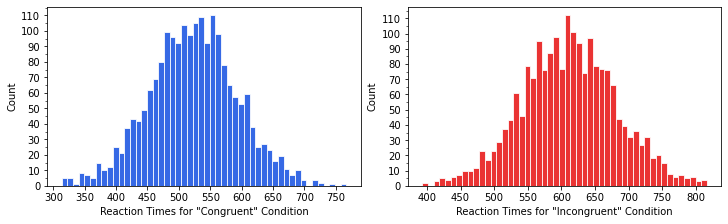

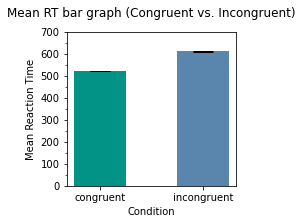

NameError: name 'by_condition' is not defined

In [6]:
import matplotlib.pyplot as plt
# using the below modules to automatically set minor ticks at a multiple of a defined value 
from matplotlib.ticker import MultipleLocator

fig1 = plt.figure(figsize=(10.0, 3.0), layout='constrained')

axes1 = fig1.add_subplot(1, 2, 1)
# below code sets the x- and y-labels of this subplot
axes1.set_xlabel('Reaction Times for "Congruent" Condition')
axes1.set_ylabel('Count')
# below code sets custom values for the x and y major ticks
axes1.set_xticks(np.arange(300, 900, 50))
axes1.set_yticks(np.arange(0, 200, 10))
# below code enables minor ticks specifically and sets them at multiples of 5
axes1.tick_params(axis="y", which="minor", direction="out")
axes1.yaxis.set_minor_locator(MultipleLocator(5))
# below code plots the 'rt' values of clean_df but only for those with congruent condition. 
axes1.hist(clean_df[clean_df['condition'] == 'congruent']['rt'], 50, density=False, edgecolor='white', facecolor='xkcd:blue', alpha=0.8)
# edge colour has been changed to white for better distinguishing between the bars

axes2 = fig1.add_subplot(1, 2, 2)
# below code sets the x- and y-labels of this subplot
axes2.set_xlabel('Reaction Times for "Incongruent" Condition')
axes2.set_ylabel('Count')
# below code sets custom values for the x and y major ticks
axes2.set_xticks(np.arange(300, 900, 50))
axes2.set_yticks(np.arange(0, 200, 10))
# below code enables minor ticks specifically and sets them at multiples of 5
axes2.tick_params(axis="y", which="minor", direction="out")
axes2.yaxis.set_minor_locator(MultipleLocator(5))
# below code plots the 'rt' values of clean_df but only for those with congruent condition. 
axes2.hist(clean_df[clean_df['condition'] == 'incongruent']['rt'], 50, density=False, edgecolor='white', facecolor='xkcd:red', alpha=0.8)
# edge colour has been changed to white for better distinguishing between the bars

fig2, ax = plt.subplots(figsize=(3.0, 3.0), layout='constrained')
by_condition_mean = clean_df.groupby(['condition'])['rt'].mean().reset_index() # a DataFrame with the mean values of 'rt' grouped over each condition (congruent and incongruent)
errors = list(clean_df.groupby(['condition'])['rt'].sem()) # a list with the standard error values of 'rt' grouped over each condition (congruent and incongruent)

ax.bar(by_condition_mean['condition'], by_condition_mean['rt'], width=0.5, color=['xkcd:teal', 'xkcd:dusty blue'], yerr=errors, capsize=10)
"""
So, I really tried to show error bars, and the approach I went with is setting yerr to the errors list
calculated in the previous step. But the SEM calculated using .sem() seems to be too small to display properly
as distinct error bars? Please point out to me where the error could have come in-- I think it's something to do
with how the SEM values for clean_df were calculated.
"""
ax.set_title('Mean RT bar graph (Congruent vs. Incongruent)', pad=15) # pad attribute to adjust the spacing of the title
ax.set_xlabel('Condition')
ax.set_ylabel('Mean Reaction Time')
ax.set_yticks(np.arange(0, 800, 100))
# below code enables minor ticks specifically and sets them at multiples of 50
ax.tick_params(axis="y", which="minor", direction="out")
ax.yaxis.set_minor_locator(MultipleLocator(50))

plt.show()
print(by_condition, '\n')
print(errors, '\n')

**Commnents:**
- Good. Error bars are fine. Although code has an error and does not fun (see above). 
- code 5/6, documentation 6/6. **total: 11/12**

## **Question 5 --- Plotting with Seaborn**

Using Seaborn:

1.  Create a violin plot of RTs by condition. (You may need to look at the violin plot documentation)
2.  Create a line plot with condition on the x-axis and RT on the y axis, using different hues for each participant. 


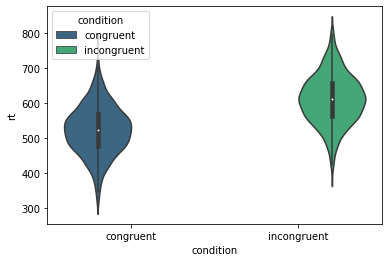

AttributeError: 'Line2D' object has no property 'errorbar'

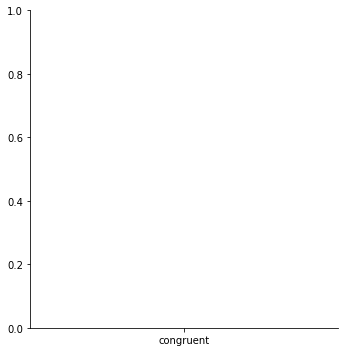

In [7]:
import seaborn as sns

violin_fig = sns.violinplot(data=clean_df, x='condition', y='rt', hue='condition', palette='viridis')
# above code ensures a different colour of the plot for each condition group
# sets the matplotlib colormap 'viridis' as the palette determining hue
plt.show()

line_fig = sns.relplot(data=clean_df, x='condition', y='rt', kind='line', hue='participant', palette='magma', errorbar=None)
# changed errorbar to None so that the output is less chaotic
# sets the matplotlib colormap 'magma' as the palette determining hue (hue changes for every participant)
plt.show()

**Comments:**
- Good! Mine throws an error with the errorbar in the line plot but I think that's a version issue on my end because your notebook looks fine.
- code: 3/3, documentation: 3/3, **total: 6/6**


## **Question 6 --- Curve Fitting: Visual Working Memory Capacity**

Researchers often measure visual working memory capacity (K) across
increasing memory loads.\
You are given:

    loads = np.array([1, 2, 3, 4, 5, 6])
    k = np.array([0.9000, 1.8000, 2.7000, 3.5000, 3.1966, 3.7939])

There are different models that describe the change in performance. One is a model that increases linearly up to a breakpoint (capacity limit), then stays flat.\

This is a model with **two stages**:

1.  **Linear growth stage:**\
    Performance increases steadily as memory load increases. 

2.  **Flat stage (capacity limit):**\
    After a certain point (the **breakpoint**), performance stops
    increasing because the memory system has reached its limit.\
    The breakpoint is the **estimated capacity**.


The model can be expressed as:

    if load ≤ k_break:
        y = a * load + b    # K is increasing with load
    else:
        y = a * k_break + b   # K stays constant

The second model is an exponential model. This model can be expressed as:



    y = A * (1 – exp(-B * load)) + C


  1. Fit both models to the data, where x is `load` and y is `k`. Report the relevant parameters for each model.  
  2. Plot both fits on the same Figure and subplot (do not use two subplots) using `matplotlib`


Parameters A, B of breakpoint model:
[0.8613125  0.06447917]
Parameters A, B, C of exponential model:
[ 4.96535206  0.40832482 -0.81753334]


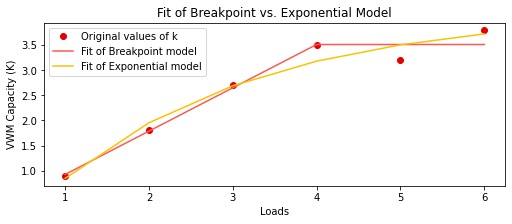

In [8]:
from scipy.optimize import curve_fit

# defining the x-data (loads) and y-data (k) as numpy arrays
loads = np.array([1, 2, 3, 4, 5, 6])
k = np.array([0.9000, 1.8000, 2.7000, 3.5000, 3.1966, 3.7939])

def break_model(loads, A, B):
    k_break = 4 # estimated from inspecting the given y-values
    y = [] # since the value of y is dependent on specific value of load, and the list of values cannot be computed in a single operation
    for load in loads:
        if load <= k_break:
            incr = load  # K is increasing with load
        else:
            incr = k_break   # K stays constant
        y.append(A * incr + B)
    return np.array(y) # returning y as a numpy array since loads and k are already defined as numpy arrays

def expo_model(load, A, B, C):
    y = A * (1 - np.exp(-B * load)) + C # defined as per given background
    return np.array(y)

break_param, break_covar = curve_fit(break_model, loads, k) # finding parameters that fit the breakpoint model as defined
print("Parameters A, B of breakpoint model:")
print(break_param)
expo_param, expo_covar = curve_fit(expo_model, loads, k) # finding parameters that fit the exponential model as defined
print("Parameters A, B, C of exponential model:")
print(expo_param)

fig, ax = plt.subplots(figsize=(7.0, 3.0), layout='constrained')

fit_y_break = break_model(loads, break_param[0], break_param[1]) # A and B values obtained for breakpoint model in previous step
fit_y_expo = expo_model(loads, expo_param[0], expo_param[1], expo_param[2]) # A, B, C values obtained for exponential model in previous step

ax.plot(loads, k, 'o', label='Original values of k', color='xkcd:red') # adding data points for original k values, with loads on the x axis
ax.plot(loads, fit_y_break, '-', label='Fit of Breakpoint model', color='xkcd:coral')  # plotting breakpoint model fit in line form with loads on the x axis
ax.plot(loads, fit_y_expo, '-', label='Fit of Exponential model', color='xkcd:goldenrod')  # plotting exponential model fit in line form with loads on the x axis
ax.set_xlabel('Loads')
ax.set_ylabel('VWM Capacity (K)')
ax.set_title("Fit of Breakpoint vs. Exponential Model")
ax.legend()

**Comments:**
- You are supposed to estimate a value of `k_break` as part of the model fit. It needs to be included as a parameter in the model. 


- code: 5/6, documentation: 5/6, **total: 11/12**

**Total grade: 56/60**